In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
data_path = '/content/drive/My Drive/PGNO-190/amazon.csv'  # Member 1

df = pd.read_csv(data_path)

# Filter to Computers&Accessories
df = df[df['category'].str.contains('Computers&Accessories', na=False)].copy()

# Initial cleaning of numerical columns
for col in ['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].str.replace('₹', '').str.replace(',', '').str.replace('%', '', regex=False), errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

print(df.info())
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
Index: 453 entries, 0 to 1020
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           453 non-null    object 
 1   product_name         453 non-null    object 
 2   category             453 non-null    object 
 3   discounted_price     453 non-null    float64
 4   actual_price         453 non-null    float64
 5   discount_percentage  453 non-null    int64  
 6   rating               453 non-null    float64
 7   rating_count         451 non-null    float64
 8   about_product        453 non-null    object 
 9   user_id              453 non-null    object 
 10  user_name            453 non-null    object 
 11  review_id            453 non-null    object 
 12  review_title         453 non-null    object 
 13  review_content 

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


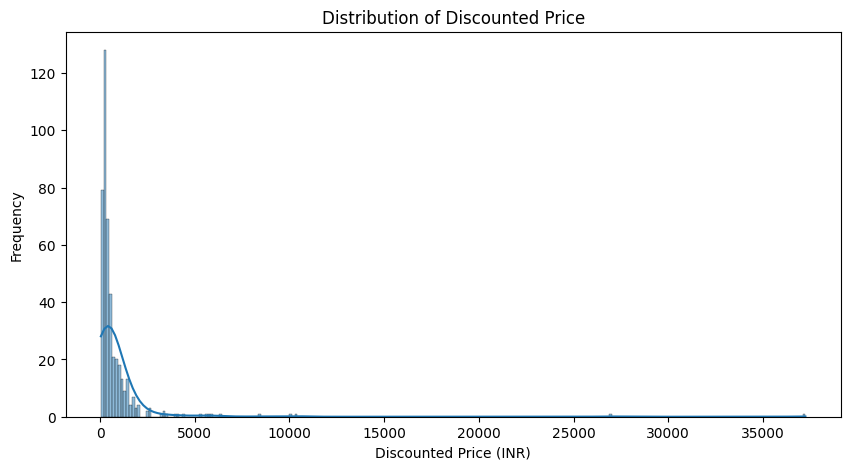

Saved to /content/drive/My Drive/PGNO-190/preprocessed_after_IT24102586.csv


In [3]:


# Handle missing data
num_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

text_cols = ['about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

# Verify
print(df.isnull().sum())

# EDA: Histogram of discounted_price
plt.figure(figsize=(10,5))
sns.histplot(df['discounted_price'].dropna(), kde=True)
plt.title('Distribution of Discounted Price')
plt.xlabel('Discounted Price (INR)')
plt.ylabel('Frequency')
plt.savefig('/content/eda_discounted_price_hist.png')
plt.show()

# Interpretation: The distribution is right-skewed, indicating most prices are low with some high outliers.

# Save
save_path = '/content/drive/My Drive/PGNO-190/preprocessed_after_IT24102586.csv'
df.to_csv(save_path, index=False)
print(f'Saved to {save_path}')